<a href="https://colab.research.google.com/github/igordantasgf/analise_dados_microambientais/blob/main/estudos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
import numpy as np
import seaborn
import math

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/Bolsa - Edson/estudos/Pasta sem nome/labmim_completo_2016_2022.dat'
frame = pd.read_csv(data_path, sep=';')
tempo = list(zip(frame['year'],frame['month'],frame['day'],frame['hour']))
print(frame.columns)
frame

Index(['year', 'month', 'day', 'hour', 'T', 'Td', 'ur', 'pressure', 'WD', 'WS',
       'u', 'v', 'precip', 'Sw_dw', 'Sw_up', 'Lw_dw', 'Lw_up', 'Sw_dif',
       'Sw_par', 'RH_WXT', 'Temp_WXT', 'Net_CNR1', 'Net_NRLite', 'PSP_Wm2_Avg',
       'oc_topo', 'decl_rad', 'elev_solar', 'ang_hor', 'ang_zen',
       'ang_hor_por', 'nascer_h', 'por_h', 'ast_h', 'fc'],
      dtype='object')


,year,month,day,hour,T,Td,ur,pressure,WD,WS,...,oc_topo,decl_rad,elev_solar,ang_hor,ang_zen,ang_hor_por,nascer_h,por_h,ast_h,fc
0,2016,9,29,14,27.1200,NaN,71.6480,NaN,132.9910,2.0290,...,1045.315,-0.047,0.874,0.681,0.696,-6.042,5.958,18.042,14.599,1.191
1,2016,9,29,15,26.9380,NaN,73.6650,NaN,149.7170,1.8150,...,794.240,-0.047,0.622,0.942,0.949,-6.042,5.958,18.042,15.600,1.191
2,2016,9,29,16,26.6870,NaN,74.6230,NaN,106.4130,1.6430,...,489.998,-0.048,0.368,1.204,1.203,-6.042,5.958,18.042,16.600,1.191
3,2016,9,29,17,26.4570,NaN,75.1850,NaN,86.3810,1.2050,...,153.340,-0.048,0.113,1.466,1.458,-6.042,5.958,18.042,17.600,1.191
4,2016,9,29,18,25.7780,NaN,78.8070,NaN,98.0980,1.2480,...,0.000,-0.048,-0.142,1.728,1.713,-6.043,5.957,18.043,18.600,1.191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52060,2022,9,14,13,25.7575,NaN,81.5167,1010.8750,154.3924,2.7922,...,1194.472,0.061,1.086,0.393,0.485,-5.946,6.054,17.946,13.501,1.171
52061,2022,9,14,14,26.2083,NaN,79.6867,1009.8583,169.6669,2.9262,...,1023.041,0.061,0.860,0.655,0.711,-5.946,6.054,17.946,14.501,1.171
52062,2022,9,14,15,26.8508,NaN,76.0992,1009.3667,146.8076,2.6029,...,780.574,0.061,0.616,0.917,0.954,-5.946,6.054,17.946,15.502,1.171
52063,2022,9,14,16,27.7925,NaN,71.8633,1009.2000,152.0525,1.2569,...,483.602,0.061,0.366,1.179,1.205,-5.947,6.053,17.947,16.502,1.171


In [4]:
# Formatação de datas
datas=[]
for i in tempo:
  i = list(i)
  datas.append(datetime.datetime(i[0],i[1],i[2],i[3]))
frame['datas'] = datas

In [5]:
# coluna na base de dados com Saldo Radioativo
frame['Rn'] = [sum(i) for i in list(zip(frame['Sw_dw'],-frame['Sw_up'],frame['Lw_dw'],-frame['Lw_up']))]

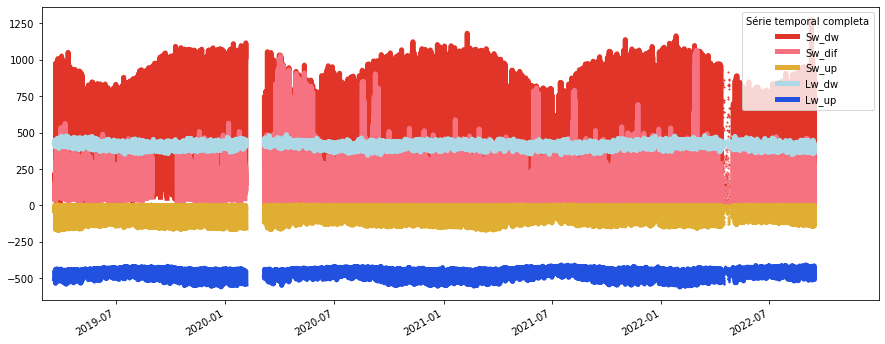

In [ ]:
#@markdown Série temporal completa

fig, ax = plt.subplots(1,1,figsize=(15, 6))
ax.plot_date(frame['datas'], frame['Sw_dw'], c='#E03528', ls='-', lw=5, markersize=1, label='Sw_dw')
ax.plot_date(frame['datas'], frame['Sw_dif'], c='#F67280', ls='-', lw=5, markersize=1, label='Sw_dif')
ax.plot_date(frame['datas'], -frame['Sw_up'], c='#E0AE33', ls='-', lw=5, markersize=1, label='Sw_up')
ax.plot_date(frame['datas'], frame['Lw_dw'], c='lightblue', ls='-', lw=5, markersize=1, label='Lw_dw')
ax.plot_date(frame['datas'], -frame['Lw_up'], c='#2251E0', ls='-', lw=5, markersize=1, label='Lw_up')
plt.legend(title='Série temporal completa')
fig.autofmt_xdate()
ax.set_xlim([datetime.datetime(2019, 2, 27, 0, 0), datetime.datetime(2022, 12, 31, 0, 0)])
plt.show()

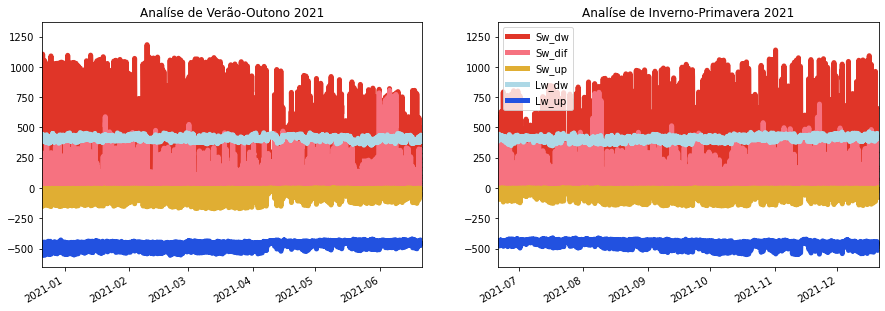

In [ ]:
#@markdown Análise de ondas ao longo do ano em dois períodos e saldo de radiação

fig, ax = plt.subplots(1,2,figsize=(15, 5))

# Analíse de Verão-Outono 2021
ax[0].set_title("Analíse de Verão-Outono 2021")
ax[0].plot_date(frame['datas'], frame['Sw_dw'], c='#E03528', ls='-', lw=5, markersize=1, label='Sw_dw')
ax[0].plot_date(frame['datas'], frame['Sw_dif'], c='#F67280', ls='-', lw=5, markersize=1, label='Sw_dif')
ax[0].plot_date(frame['datas'], -frame['Sw_up'], c='#E0AE33', ls='-', lw=5, markersize=1, label='Sw_up')
ax[0].plot_date(frame['datas'], frame['Lw_dw'], c='lightblue', ls='-', lw=5, markersize=1, label='Lw_dw')
ax[0].plot_date(frame['datas'], -frame['Lw_up'], c='#2251E0', ls='-', lw=5, markersize=1, label='Lw_up')
fig.autofmt_xdate()
ax[0].set_xlim([datetime.datetime(2020, 12, 21, 0, 0), datetime.datetime(2021, 6, 21, 0, 0)])

# Analíse de Inverno-Primavera 2021
ax[1].set_title("Analíse de Inverno-Primavera 2021")
ax[1].plot_date(frame['datas'], frame['Sw_dw'], c='#E03528', ls='-', lw=5, markersize=1, label='Sw_dw')
ax[1].plot_date(frame['datas'], frame['Sw_dif'], c='#F67280', ls='-', lw=5, markersize=1, label='Sw_dif')
ax[1].plot_date(frame['datas'], -frame['Sw_up'], c='#E0AE33', ls='-', lw=5, markersize=1, label='Sw_up')
ax[1].plot_date(frame['datas'], frame['Lw_dw'], c='lightblue', ls='-', lw=5, markersize=1, label='Lw_dw')
ax[1].plot_date(frame['datas'], -frame['Lw_up'], c='#2251E0', ls='-', lw=5, markersize=1, label='Lw_up')

plt.legend()
fig.autofmt_xdate()
ax[1].set_xlim([datetime.datetime(2021, 6, 21, 0, 0), datetime.datetime(2021, 12, 21, 0, 0)])

plt.show()

# Climatologia
## Boxplot de médias mensais
### Calcular médias mensais para cada ano
* SW_dw 
* SW_up 
* SW_df 
* SW_top (gráfico de linha) 
* Lw_dw 
* Lw_up

In [6]:
frame['year/month'] = list(zip(frame['datas'].dt.year, frame['datas'].dt.month))

In [7]:
ano_mes_frame = frame.groupby('year/month')

lista_YM_dados = []
for group in ano_mes_frame:
  lista_YM_dados.append(group)

# Criar função nesse trecho VVV

listas_Ym_Swdw = []
listas_Ym_Swdw_datas = []
for i in list(lista_YM_dados):
  i[1].dropna()
  if i[0][0] in [2016,2017,2018,2019]:
    if i[0][0] == 2019 and i[0][1] > 2:

      listas_Ym_Swdw.append(i[1]['Sw_up'])
      listas_Ym_Swdw_datas.append(list(i[0]))

    continue
  listas_Ym_Swdw.append(i[1]['Sw_up'])
  listas_Ym_Swdw_datas.append(list(i[0]))


  lista_final = list(zip(listas_Ym_Swdw,listas_Ym_Swdw_datas))
# ^^^^^^


In [ ]:
ts = pd.Series(listas_Ym_Swdw_datas)

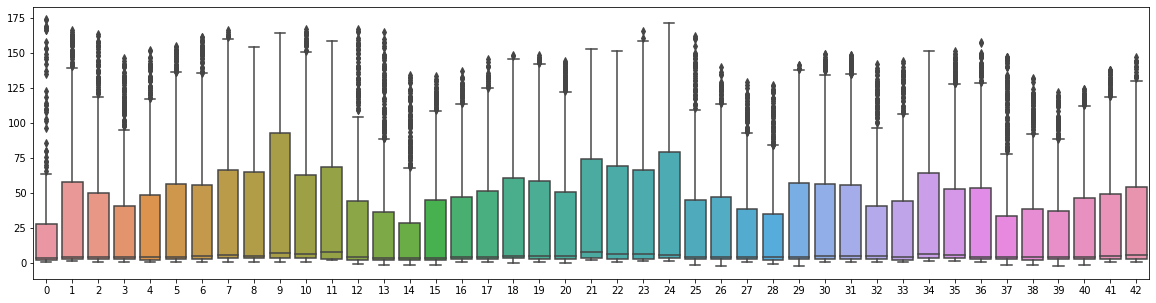

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
seaborn.boxplot(data=listas_Ym_Swdw, orient='v')

# Novo plot 
## Médias mensais diárias
---
## **Filtrar dados:** agrupar em mes/ano/hora com valor acumulado

In [8]:
frame['day_sum'] = list(zip(frame['datas'].dt.year, frame['datas'].dt.month, frame['datas'].dt.hour))
daysum = frame.groupby('day_sum').sum()

In [9]:
daysum = pd.DataFrame(daysum, columns=['Sw_dw','Sw_up','Sw_dif','Lw_dw','Lw_up','precip'])

In [10]:
#daysum.tail(40)

## **Próximo filtro:** Média diária mensal

In [11]:
mesano=[]
for i in daysum.index:
  mesano.append((i[0],i[1]))
daysum['ano/mes'] = mesano

In [12]:
monthmean = daysum.groupby('ano/mes').mean()
months = daysum.groupby('ano/mes')

In [13]:
monthmean = pd.DataFrame(monthmean)
#monthmean

## **Próximo filtro:** Méida diária mensal para anos diferentes

In [14]:
anos=[]
mes=[]
for i in monthmean.index:
  anos.append(i[0])
  mes.append(i[1])
monthmean['anos'] = anos
monthmean['meses'] = mes

* Agrupamento dos dados em anos diferentes, criando blocos para cada ano com a média mensal de todos meses desse mesmo ano

In [15]:
dados_anos=[]
anos = monthmean.groupby('anos')
for group in anos:
  dados_anos.append(group)

In [16]:
 dados_anos[0] #(2016 até 2022)

(2016,
                   Sw_dw  Sw_up  Sw_dif         Lw_dw  Lw_up    precip  anos  \
 ano/mes                                                                       
 (2016, 9)    233.721875    0.0     0.0    581.154958    0.0  0.000000  2016   
 (2016, 10)  7732.760583    0.0     0.0  12209.753250    0.0  3.312583  2016   
 (2016, 11)  6267.738792    0.0     0.0   9749.280750    0.0  1.915583  2016   
 (2016, 12)  7844.726625    0.0     0.0  12603.069042    0.0  1.735667  2016   
 
             meses  
 ano/mes            
 (2016, 9)       9  
 (2016, 10)     10  
 (2016, 11)     11  
 (2016, 12)     12  )

* Plotting dos dados mensais para cada ano

In [17]:
month_group = []
for group in months:
  month_group.append(group)
month_group[0]

((2016, 9),
                   Sw_dw  Sw_up  Sw_dif    Lw_dw  Lw_up  precip    ano/mes
 day_sum                                                                  
 (2016, 9, 0)      0.000    0.0     0.0  415.083    0.0     0.0  (2016, 9)
 (2016, 9, 1)      0.000    0.0     0.0  410.167    0.0     0.0  (2016, 9)
 (2016, 9, 2)      0.000    0.0     0.0  404.417    0.0     0.0  (2016, 9)
 (2016, 9, 3)      0.000    0.0     0.0  402.283    0.0     0.0  (2016, 9)
 (2016, 9, 4)      0.000    0.0     0.0  392.167    0.0     0.0  (2016, 9)
 (2016, 9, 5)      0.000    0.0     0.0  384.150    0.0     0.0  (2016, 9)
 (2016, 9, 6)      0.000    0.0     0.0  384.500    0.0     0.0  (2016, 9)
 (2016, 9, 7)    292.925    0.0     0.0  391.625    0.0     0.0  (2016, 9)
 (2016, 9, 8)    421.983    0.0     0.0  416.383    0.0     0.0  (2016, 9)
 (2016, 9, 9)    253.600    0.0     0.0  434.067    0.0     0.0  (2016, 9)
 (2016, 9, 10)   446.417    0.0     0.0  430.583    0.0     0.0  (2016, 9)
 (2016, 9, 11

agora é 2017
agora é 2018
agora é 2019
agora é 2020


agora é 2021
agora é 2022


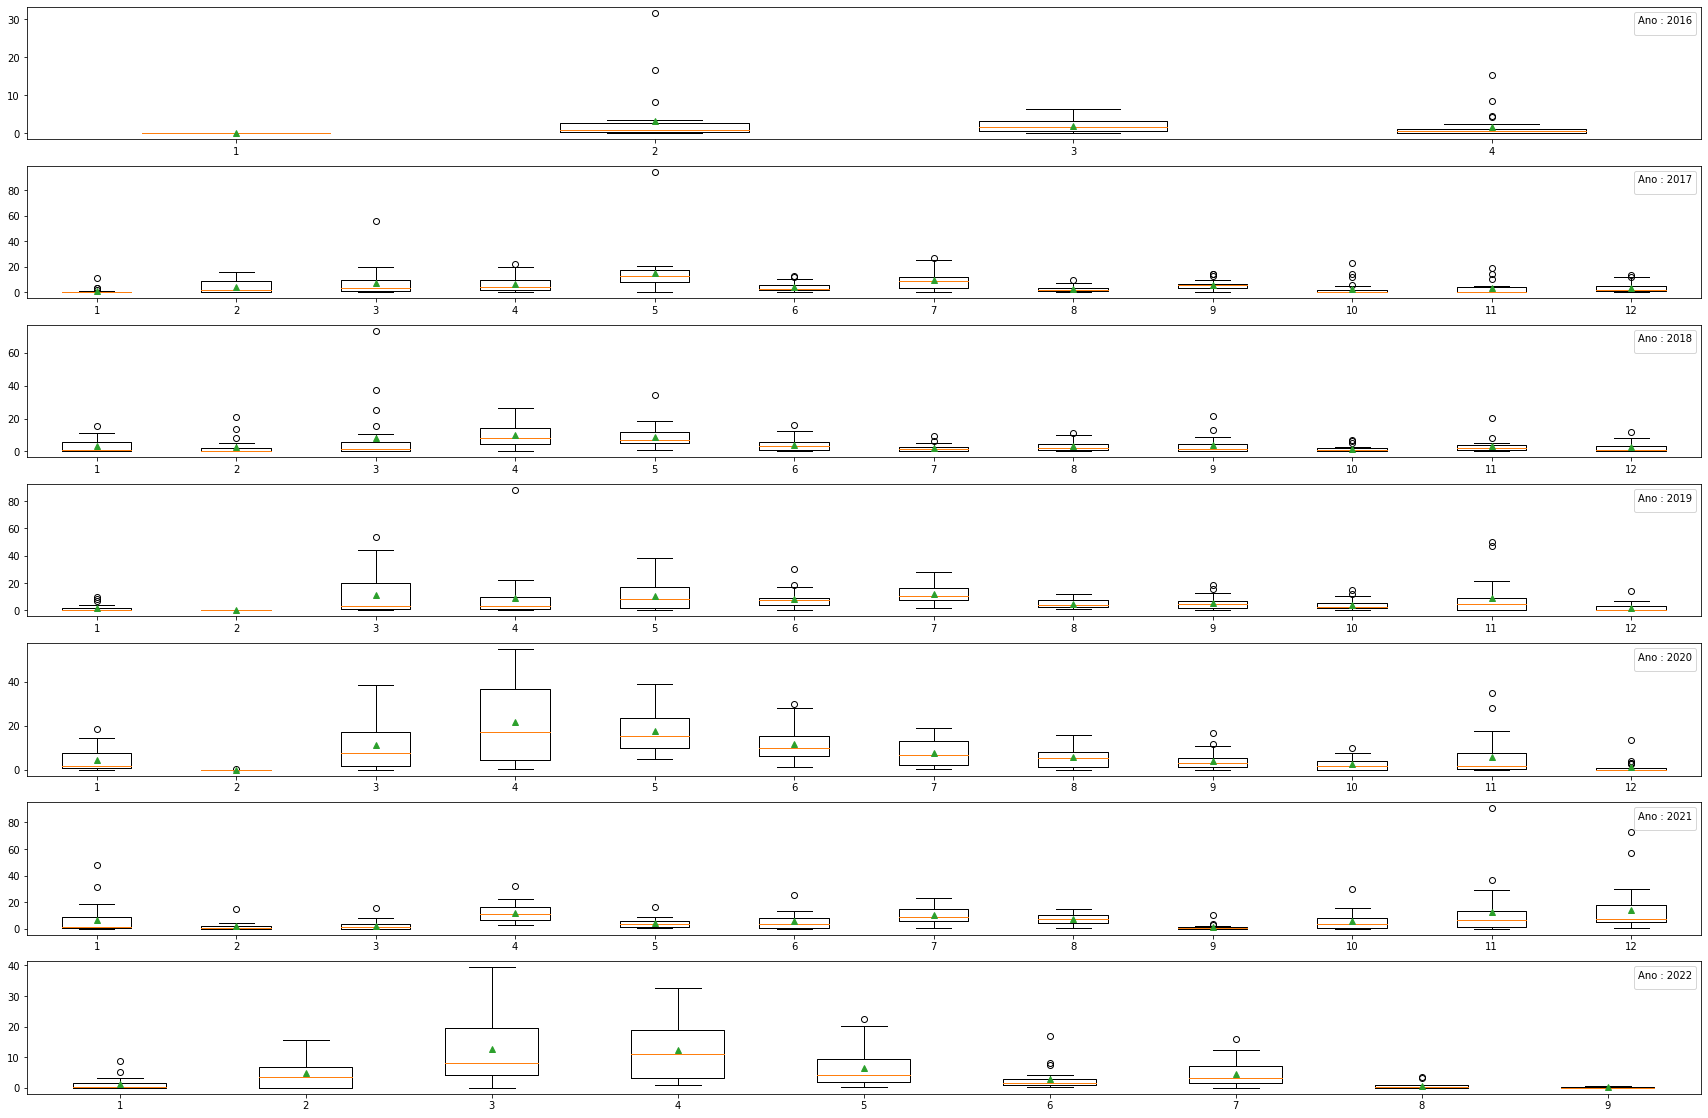

In [44]:
#@title Boxplot
#@markdown * Valores acumulados diariamente
#@markdown * Parâmetro = precipitação

fig, ax = plt.subplots(7,1, figsize=(30,20))

parametro='precip'
ano = 2016 
j=0
lista=[]
for i in month_group:

  if i[0][0]!=ano:
    ax[j].boxplot(lista, showmeans=True)
    ax[j].legend(title='Ano : {}'.format(ano))
    ano = i[0][0]
    print('agora é', ano)
    j=j+1
    lista=[]
  lista.append(list(i[1][parametro]))

ax[j].boxplot(lista, showmeans=True)
ax[j].legend(title='Ano : {}'.format(ano))

plt.show()